In [1]:
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model

# reflect the tables

In [9]:
mea_columns = inspector.get_columns('measurement')
for column in mea_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
sta_columns = inspector.get_columns('station')
for column in sta_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# We can view all of the classes that automap found


In [14]:
Base = automap_base()

In [15]:
Base.prepare(engine, reflect=True)

In [16]:
Base.classes.keys()

['measurement', 'station']

In [17]:
Measurement = Base.classes.measurement

In [18]:
Station = Base.classes.station

In [19]:
# Save references to each table


In [20]:
# Create our session (link) from Python to the DB


In [21]:
session = Session(engine)

In [22]:
for row in session.query(Measurement, Measurement.prcp).limit(10).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a280>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a4c0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a550>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a5b0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a610>, None)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a670>, 0.06)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a6d0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a730>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a790>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x7f9bbbd1a7f0>, 0.01)


# Exploratory Climate Analysis

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [24]:
# Calculate the date 1 year ago from the last data point in the database

In [25]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [26]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [27]:
# Perform a query to retrieve the data and precipitation scores

In [28]:
session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-23', 'USC00519397', 0.0),
 ('2016-08-23', 'USC00513117', 0.15),
 ('2016-08-23', 'USC00514830', 0.05),
 ('2016-08-23', 'USC00517948', None),
 ('2016-08-23', 'USC00519523', 0.02),
 ('2016-08-23', 'USC00519281', 1.79),
 ('2016-08-23', 'USC00516128', 0.7),
 ('2016-08-24', 'USC00519397', 0.08),
 ('2016-08-24', 'USC00513117', 2.15),
 ('2016-08-24', 'USC00514830', 2.28),
 ('2016-08-24', 'USC00517948', None),
 ('2016-08-24', 'USC00519523', 1.22),
 ('2016-08-24', 'USC00519281', 2.15),
 ('2016-08-24', 'USC00516128', 1.45),
 ('2016-08-25', 'USC00519397', 0.08),
 ('2016-08-25', 'USC00513117', 0.08),
 ('2016-08-25', 'USC00514830', 0.0),
 ('2016-08-25', 'USC00517948', 0.0),
 ('2016-08-25', 'USC00519523', 0.21),
 ('2016-08-25', 'USC00519281', 0.06),
 ('2016-08-25', 'USC00516128', 0.11),
 ('2016-08-26', 'USC00519397', 0.0),
 ('2016-08-26', 'USC00513117', 0.03),
 ('2016-08-26', 'USC00514830', 0.02),
 ('2016-08-26', 'USC00517948', 0.04),
 ('2016-08-26', 'USC00519523', 0.0),
 ('2016-08-26', 'U

In [29]:
count_a_year_ago = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').count()
print(count_a_year_ago)

2230


In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [31]:
stmt = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').statement
df2 = pd.read_sql_query(stmt, session.bind)
df2

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00
...,...,...,...
2225,2017-08-19,USC00516128,0.09
2226,2017-08-20,USC00516128,NaN
2227,2017-08-21,USC00516128,0.56
2228,2017-08-22,USC00516128,0.50


In [32]:
# Use Pandas Plotting with Matplotlib to plot the data

In [33]:
# fig, ax = plt.subplots()
# ypos = range(1, len(prcp)+1)
# ax.bar(ypos, scores[::-1])
# ax.set_xlabel("prcp")
# ax.set_ylabel("date")
# ax.set_yticks(ypos)
# ax.set_yticklabels(prcp[::-1])
# ax.set_title("Precipitation")
# fig.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>


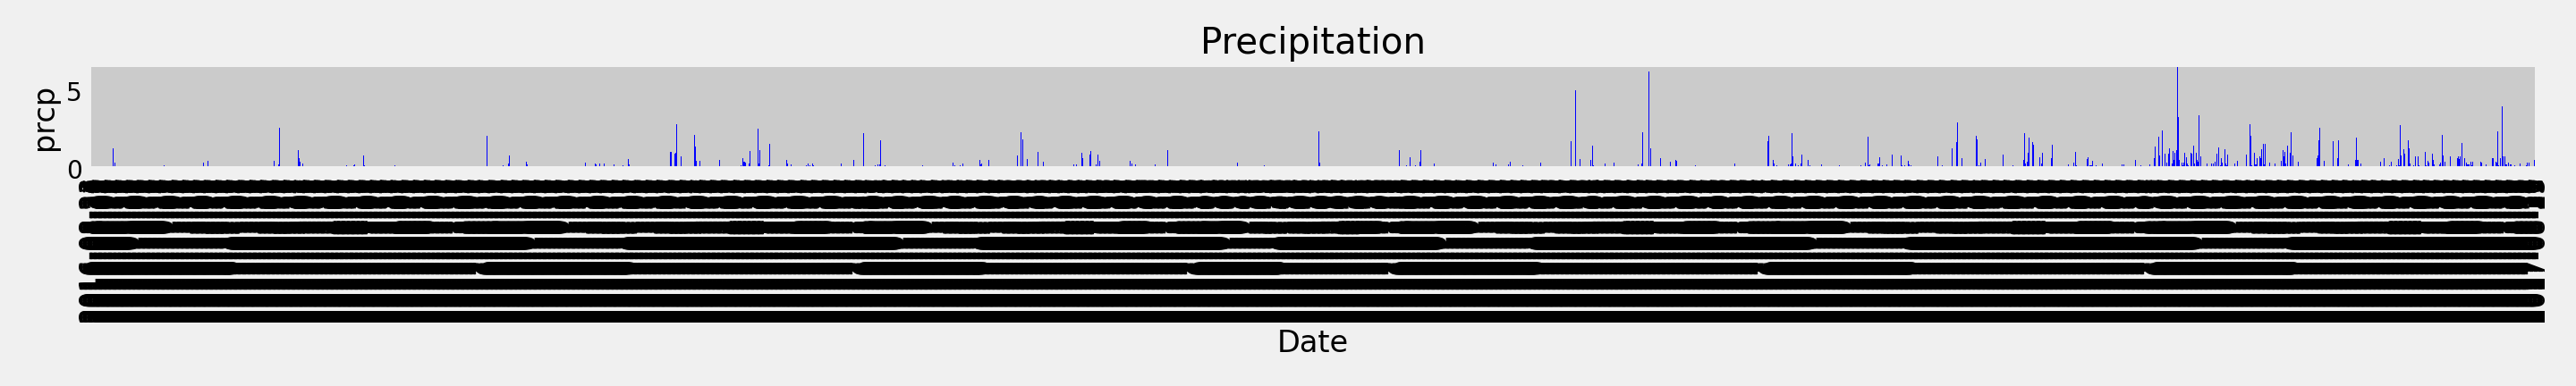

In [57]:
# Set x axis and tick locations
x_axis = np.arange(len(df2))
# x_axis = np.arange(start=0, stop=len(df2), step=200)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, df2["prcp"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, df2["date"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(df2["prcp"]))

# Set a Title and labels
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("prcp")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


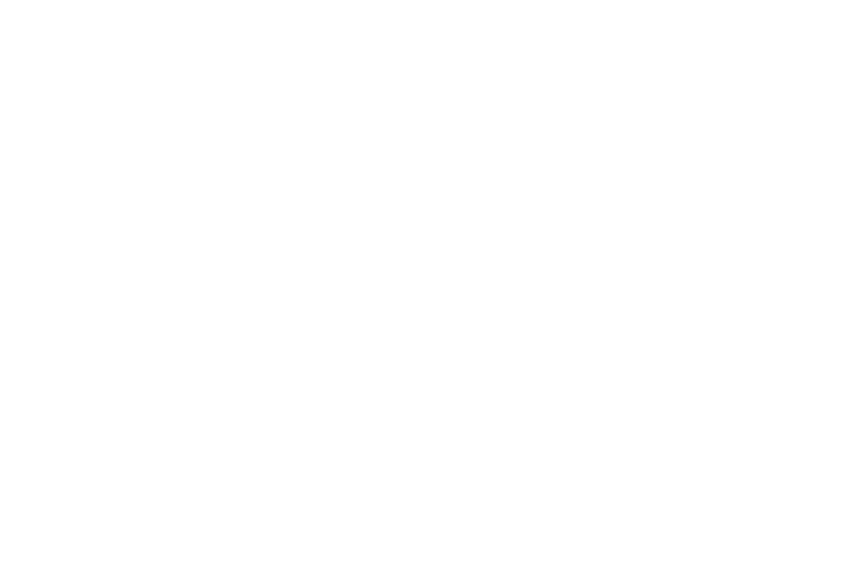

In [35]:
df2.iloc[::-1].plot.bar(title="precipitation")
plt.tight_layout()
plt.show()

In [46]:
# Filter the DataFrame down only to those columns to chart
date_and_inches = df2[['date',"prcp"]]

In [47]:
# Set the index to be "State" so they will be used as labels
date_and_inches = date_and_inches.set_index("date")

In [49]:
date_and_inches.sort_index(ascending=False)

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


In [63]:
# Use DataFrame.plot() in order to create a bar chart of the data
date_and_inches.plot(kind="bar", figsize=(20,3), use_index='date')

# Set a title for the chart
plt.title("Precipitation")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

ConversionError: Failed to convert value(s) to axis units: '200'

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2.describe()

In [ ]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Measurement.station)).all()

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, Measurement.date, 
       func.min(Measurement.prcp), 
       func.max(Measurement.prcp), 
       func.avg(Measurement.prcp), 
       func.count(Measurement.prcp)]
most_active_station = session.query(*sel).\
    filter(func.strftime(Measurement.station) == "USC00519281").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
most_active_station

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
USC00519281 = session.query(Measurement).\
    filter(Measurement.station == 'USC00519281').count()
print(f"There are {USC00519281} rows of data for USC00519281.")

In [ ]:
session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).limit(366).all()

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
stmt = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).limit(366).all().statement

In [ ]:
USC00519281df = pd.read_sql_query(stmt, session.bind)
USC00519281df

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
